In [1]:
import pandas as pd
import numpy as np
import os
import tushare as ts
mytoken = '*****' # ***是tushare的api,大家可以自己到tushare上注册获取api,（免费的）
ts.set_token(mytoken)
ts.set_token(mytoken)
save_path = 'stock'
pro = ts.pro_api()

In [2]:
# base_path = 'stock'
# index_df = pd.read_csv(os.path.join(base_path,  'OldData', '000001.SH' + '_NormalData.csv'))
startdate=20040101
enddate=20200101
index_df = pro.index_daily(ts_code='000001.SH',
                     start_date=startdate,
                     end_date=enddate,
                     fields='ts_code, trade_date, open, high, low, close, pre_close, change, pct_chg, '
                            'vol, amount')
index_df = index_df.sort_values('trade_date', ascending=True).reset_index(drop=True)

In [3]:
index_df['rate'] = (index_df['close'] - index_df['pre_close']) / index_df['pre_close']
index_df['Collapse'] = index_df['rate'] < -0.02
index_df['Collapse_sum'] = index_df['Collapse'].rolling(4).sum()

# index_df['rise'] = index_df['rate'] > 0.015
# index_df['rise_sum'] = index_df['Collapse'].rolling(5).sum()

In [4]:
index_df.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,rate,Collapse,Collapse_sum
0,000001.SH,20040102,1517.193,1492.724,1526.244,1491.694,1497.044,20.149,1.3459,16680528.0,1.253196e+07,0.013459,False,NaN
1,000001.SH,20040105,1568.353,1516.797,1568.815,1516.697,1517.193,51.160,3.3720,28573006.0,2.146433e+07,0.033720,False,NaN
2,000001.SH,20040106,1574.523,1568.899,1589.083,1557.927,1568.353,6.170,0.3934,32698229.0,2.407137e+07,0.003934,False,NaN
3,000001.SH,20040107,1587.204,1574.102,1594.997,1565.087,1574.523,12.681,0.8054,30530408.0,2.308193e+07,0.008054,False,0.0
4,000001.SH,20040108,1610.126,1587.451,1616.576,1582.880,1587.204,22.922,1.4442,28440593.0,2.210928e+07,0.014442,False,0.0


-------------- 1 -------------

5 天均线上        + 1  层仓

5 天均线下        - 1  层仓

-------------- 2 -------------
10天均线上        + 1.5层仓


偏离3%以内        - 0.5层仓

偏离3%-6%以内      - 1层仓

偏离6%以上        - 1.5层仓

-------------- 3 -------------

21天均线上        + 1.5层仓

偏离3%以内        - 0.5层仓

偏离3%-6%以内      - 1  层仓

偏离6%以上        - 1.5层仓


-------------- 4 -------------

30天均线上        + 1  层仓

偏离5%以内        -0.5 层仓

偏离5%以上        - 1  层仓


-------------- 5 -------------

5 天均线趋势向上    + 1  层仓

趋势走平或向下     - 1  层仓


-------------- 6 -------------

10天均线趋势向上    + 1.5层仓

趋势走平         - 1  层仓

趋势向下         - 1.5层仓


-------------- 7 -------------

21天均线趋势向上    + 1.5层仓

趋势走平         - 1  层仓

趋势向下         - 1.5层仓

-------------- 8 -------------

30天均线趋势向上    + 1  层仓

趋势走平         - 0.5层仓

趋势向下         - 1  层仓

In [5]:
index_df = index_df.sort_values('trade_date', ascending=True).reset_index(drop=True)

In [6]:
# 计算均线
for day in [3, 10, 20, 30]:
    index_df['ma'+str(day)] = index_df.pre_close.rolling(day).mean()

# 计算趋势

In [7]:
col = ['ma3', 'ma10', 'ma20', 'ma30']
tmp_df2 = index_df[col].shift(1)
tmp_df3 = index_df[col].shift(2)
for tmp_col in col:
    index_df[tmp_col + '_trend'] = 0
    # tmp_df[tmp_col + '_shift_1'] = tmp_df2[tmp_col]
    # tmp_df[tmp_col _ 'shift_2'] = tmp_df3[tmp_col]
    index_df['rate1'] = (tmp_df2[tmp_col] - tmp_df3[tmp_col]) / (tmp_df3[tmp_col] + 0.00001)
    index_df['rate2'] = (index_df[tmp_col] - tmp_df2[tmp_col]) / (tmp_df2[tmp_col] + 0.00001)
    idx = (index_df['rate1'] > 0.006) & (index_df['rate2'] > 0.006)
    index_df.loc[idx, tmp_col + '_trend'] = 1 # 趋势向上

    idx = (index_df['rate1'] < -0.003) & (index_df['rate2'] < -0.003)
    index_df.loc[idx, tmp_col + '_trend'] = 2 # 趋势向下

In [8]:
index_df.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,...,ma3,ma10,ma20,ma30,ma3_trend,rate1,rate2,ma10_trend,ma20_trend,ma30_trend
0,000001.SH,20040102,1517.193,1492.724,1526.244,1491.694,1497.044,20.149,1.3459,16680528.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0
1,000001.SH,20040105,1568.353,1516.797,1568.815,1516.697,1517.193,51.160,3.3720,28573006.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0
2,000001.SH,20040106,1574.523,1568.899,1589.083,1557.927,1568.353,6.170,0.3934,32698229.0,...,1527.530000,NaN,NaN,NaN,0,NaN,NaN,0,0,0
3,000001.SH,20040107,1587.204,1574.102,1594.997,1565.087,1574.523,12.681,0.8054,30530408.0,...,1553.356333,NaN,NaN,NaN,0,NaN,NaN,0,0,0
4,000001.SH,20040108,1610.126,1587.451,1616.576,1582.880,1587.204,22.922,1.4442,28440593.0,...,1576.693333,NaN,NaN,NaN,1,NaN,NaN,0,0,0


In [9]:
index_df = index_df.loc[31:].reset_index(drop=True)
index_df_copy = index_df.copy()

In [10]:
def compute_score(index_df, i):
    score = 0
    tmp_rate = (index_df['close'][i]-index_df['ma3'][i])
    if tmp_rate>=0:
        score += 1
        
    tmp_rate = (index_df['close'][i]-index_df['ma10'][i])
    if tmp_rate>=0:
        score += 2
    elif tmp_rate>-0.03:
        score += 1
    elif tmp_rate>-0.06:
        score += 0.5
    
    tmp_rate = (index_df['close'][i]-index_df['ma20'][i])
    if tmp_rate>=0:
        score += 2
    elif tmp_rate>-0.03:
        score += 1
    elif tmp_rate>-0.06:
        score += 0.5

    tmp_rate = (index_df['close'][i]-index_df['ma30'][i])
    if tmp_rate>=0:
        score += 1
    
    if index_df['ma3_trend'][i] == 1:
        score += 1
    
    if index_df['ma10_trend'][i] == 1:
        score += 2
    elif index_df['ma10_trend'][i] == 0:
        score += 1

    if index_df['ma20_trend'][i] == 1:
        score += 1.5
    elif index_df['ma20_trend'][i] == 0:
        score += 0.5

    # 附加
    if score > 10:
        score=10  
        
    if index_df['Collapse_sum'][i] > 0:
#         if score > 8:
#             score = score - 2
#         else:   
        score = score - 1.5
        if score < 0:
            score = 0
  
    return score
    

In [11]:
def print_info(hold_money, hold_market_value, index_df, i, kind, change_amount):
    trade_date = index_df['trade_date'][i]
    change_amount = round(change_amount,2)
    rate = (index_df['close'][i] - index_df['pre_close'][i]) / index_df['pre_close'][i]
    rate = round(rate, 2)
    info = str(trade_date)
    if rate > 0:
        info += ', 上涨' + str(rate)
    else:
        info += ', 下跌' + str(rate)
        
    if kind == 1:
        info += ', 加仓' + str(change_amount) 
    
    elif kind == 2:
        info += ', 减仓' + str(change_amount) 
    
    info += ',持有现金：'+str(round(hold_money,2))+',持有市值：'+\
    str(round(hold_market_value,2))+',总市值：'+str(round(hold_money+hold_market_value,2))
    print(info)

In [22]:
# 设置起始时间
# 2004年1月1日开始
index_df = index_df_copy.loc[:].reset_index(drop=True)
index_df.head()

# 2007年11月1日开始
# index_df = index_df_copy.loc[895:].reset_index(drop=True)
# index_df.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,...,ma3,ma10,ma20,ma30,ma3_trend,rate1,rate2,ma10_trend,ma20_trend,ma30_trend
0,000001.SH,20040226,1654.898,1642.409,1655.295,1628.840,1647.381,7.517,0.4563,23111684.0,...,1670.444000,1689.0167,1675.64860,1648.172867,2,0.003771,0.002640,0,0,0
1,000001.SH,20040227,1675.067,1657.262,1675.323,1657.039,1654.898,20.169,1.2187,19708363.0,...,1661.525333,1688.1233,1676.95165,1651.057700,2,0.002640,0.001750,0,0,0
2,000001.SH,20040301,1689.760,1676.222,1690.070,1661.339,1675.067,14.693,0.8772,19990178.0,...,1659.115333,1689.7761,1681.16855,1654.409167,0,0.001750,0.002030,0,0,0
3,000001.SH,20040302,1687.278,1692.616,1694.815,1677.979,1689.760,-2.482,-0.1469,20507503.0,...,1673.241667,1689.0694,1684.46255,1657.827700,0,0.002030,0.002066,0,0,0
4,000001.SH,20040303,1661.812,1686.964,1688.935,1654.564,1687.278,-25.466,-1.5093,19239974.0,...,1684.035000,1687.4198,1686.36235,1660.399433,1,0.002066,0.001551,0,0,0


In [23]:


score_list = []
hold_mount = 0
money_init = 100000
hold_money = money_init
hold_market_value = 0
hold_market_value_list = []
hold_money_list = []
all_value_list = []
change_amount = 0
for i in range(len(index_df)):
    score = compute_score(index_df, i) / 10
    if i == 0:
        buy_money = int(money_init * score)
        hold_market_value = buy_money
        hold_money = hold_money - buy_money
        print(str(index_df['trade_date'][i])+'买入：'+str(str(buy_money)))
    else:
        hold_market_value = hold_market_value * index_df['close'][i]/index_df['pre_close'][i]
        if score_list[-1] == score:
            kind = 0
            
        elif score_list[-1] < score: #加仓
            if score_list[-1] == 0:
                add_mount = score
            else:
                add_mount = score - score_list[-1]
            
            buy_money = int(hold_money/(1-score_list[-1])* (add_mount))
            hold_market_value += buy_money
            hold_money -= buy_money
            kind = 1
            change_amount = add_mount
            
        else: #减仓
            reduce_mount =  score_list[-1] - score
            sell_money = int(hold_market_value/score_list[-1] * (reduce_mount))
            hold_market_value -= sell_money
            hold_money += sell_money
            change_amount = sell_money
            kind = 2
            
        print_info(hold_money, hold_market_value, index_df, i, kind, change_amount) 
        
    score_list.append(score)
    hold_market_value_list.append(hold_market_value)
    hold_money_list.append(hold_money)
    all_value_list.append(hold_money+hold_market_value)

20040226买入：10000
20040227, 上涨0.01, 加仓0.1,持有现金：80000,持有市值：20121.87,总市值：100121.87
20040301, 上涨0.01, 加仓0.3,持有现金：50000,持有市值：50298.38,总市值：100298.38
20040302, 下跌-0.0, 加仓0.05,持有现金：45000,持有市值：55224.49,总市值：100224.49
20040303, 下跌-0.02, 减仓19778,持有现金：64778,持有市值：34612.99,总市值：99390.99
20040304, 下跌0.0, 减仓9931,持有现金：74709,持有市值：24829.08,总市值：99538.08
20040305, 下跌-0.0, 减仓9891,持有现金：84600,持有市值：14837.24,总市值：99437.24
20040308, 下跌-0.02,持有现金：84600,持有市值：14614.5,总市值：99214.5
20040309, 下跌-0.0,持有现金：84600,持有市值：14614.1,总市值：99214.1
20040310, 上涨0.03, 加仓0.6,持有现金：24883,持有市值：74696.87,总市值：99579.87
20040311, 上涨0.01,持有现金：24883,持有市值：75300.92,总市值：100183.92
20040312, 下跌0.0,持有现金：24883,持有市值：75438.91,总市值：100321.91
20040315, 上涨0.02, 加仓0.1,持有现金：14930,持有市值：87238.19,总市值：102168.19
20040316, 上涨0.01,持有现金：14930,持有市值：87706.64,总市值：102636.64
20040317, 下跌-0.0,持有现金：14930,持有市值：87684.28,总市值：102614.28
20040318, 下跌-0.02, 减仓10151,持有现金：25081,持有市值：76134.53,总市值：101215.53
20040319, 上涨0.02,持有现金：25081,持有市值：77491.71,总市值：102572.71
20040322, 下跌0.0,持有现金：25081

20051226, 上涨0.01,持有现金：22717,持有市值：70536.0,总市值：93253.0
20051227, 下跌-0.0,持有现金：22717,持有市值：70381.43,总市值：93098.43
20051228, 下跌0.0,持有现金：22717,持有市值：70548.86,总市值：93265.86
20051229, 上涨0.01,持有现金：22717,持有市值：71331.04,总市值：94048.04
20051230, 下跌-0.01,持有现金：22717,持有市值：70794.16,总市值：93511.16
20060104, 上涨0.02,持有现金：22717,持有市值：72007.91,总市值：94724.91
20060105, 上涨0.01,持有现金：22717,持有市值：73002.15,总市值：95719.15
20060106, 上涨0.01, 加仓0.1,持有现金：13631,持有市值：82829.16,总市值：96460.16
20060109, 上涨0.01,持有现金：13631,持有市值：83256.93,总市值：96887.93
20060110, 下跌0.0, 加仓0.1,持有现金：4544,持有市值：92682.94,总市值：97226.94
20060111, 下跌-0.01, 减仓9679,持有现金：14223,持有市值：82277.66,总市值：96500.66
20060112, 上涨0.01, 减仓9804,持有现金：24027,持有市值：73536.97,总市值：97563.97
20060113, 下跌-0.0,持有现金：24027,持有市值：73222.55,总市值：97249.55
20060116, 下跌-0.02, 减仓9614,持有现金：33641,持有市值：62494.14,总市值：96135.14
20060117, 下跌0.0,持有现金：33641,持有市值：62783.47,总市值：96424.47
20060118, 上涨0.02, 加仓0.1,持有现金：24030,持有市值：73688.76,总市值：97718.76
20060119, 上涨0.01,持有现金：24030,持有市值：74777.7,总市值：98807.7
20060120, 下跌0.0,持有现金：2403

20071206, 下跌-0.0, 加仓0.15,持有现金：193261,持有市值：82763.83,总市值：276024.83
20071207, 上涨0.01, 加仓0.25,持有现金：124240,持有市值：152716.56,总市值：276956.56
20071210, 上涨0.01, 加仓0.2,持有现金：69023,持有市值：210037.95,总市值：279060.95
20071211, 下跌0.0,持有现金：69023,持有市值：210573.3,总市值：279596.3
20071212, 下跌-0.02, 减仓27644,持有现金：96667,持有市值：179693.12,总市值：276360.12
20071213, 下跌-0.03, 减仓174844,持有现金：271511,持有市值：0.21,总市值：271511.21
20071214, 上涨0.01,持有现金：271511,持有市值：0.21,总市值：271511.21
20071217, 下跌-0.03,持有现金：271511,持有市值：0.21,总市值：271511.21
20071218, 下跌-0.01,持有现金：271511,持有市值：0.21,总市值：271511.21
20071219, 上涨0.02, 加仓0.05,持有现金：257936,持有市值：13575.21,总市值：271511.21
20071220, 上涨0.02, 加仓0.45,持有现金：135756,持有市值：136034.72,总市值：271790.72
20071221, 上涨0.01, 加仓0.25,持有现金：67878,持有市值：205483.69,总市值：273361.69
20071224, 上涨0.03, 加仓0.1,持有现金：40727,持有市值：237970.69,总市值：278697.69
20071225, 下跌-0.01,持有现金：40727,持有市值：236466.69,总市值：277193.69
20071226, 上涨0.01,持有现金：40727,持有市值：237929.27,总市值：278656.27
20071227, 上涨0.01,持有现金：40727,持有市值：241363.53,总市值：282090.53
20071228, 下跌-0.01, 减仓28142,

20091113, 下跌0.0, 加仓0.1,持有现金：83954,持有市值：253688.42,总市值：337642.42
20091116, 上涨0.03, 加仓0.1,持有现金：50373,持有市值：294225.22,总市值：344598.22
20091117, 下跌0.0,持有现金：50373,持有市值：294929.64,总市值：345302.64
20091118, 上涨0.01,持有现金：50373,持有市值：296757.41,总市值：347130.41
20091119, 上涨0.01,持有现金：50373,持有市值：298318.62,总市值：348691.62
20091120, 下跌-0.0, 减仓34966,持有现金：85339,持有市值：262250.66,总市值：347589.66
20091123, 上涨0.01,持有现金：85339,持有市值：264653.87,总市值：349992.87
20091124, 下跌-0.03, 减仓153316,持有现金：238655,持有市值：102211.03,总市值：340866.03
20091125, 上涨0.02, 加仓0.2,持有现金：170468,持有市值：172511.01,总市值：342979.01
20091126, 下跌-0.04, 减仓133009,持有现金：303477,持有市值：33252.86,总市值：336729.86
20091127, 下跌-0.02, 减仓32469,持有现金：335946,持有市值：0.35,总市值：335946.35
20091130, 上涨0.03, 加仓0.2,持有现金：268757,持有市值：67189.36,总市值：335946.36
20091201, 上涨0.01, 加仓0.2,持有现金：201568,持有市值：135220.77,总市值：336788.77
20091202, 上涨0.01, 加仓0.2,持有现金：134379,持有市值：203847.05,总市值：338226.05
20091203, 下跌-0.0, 加仓0.25,持有现金：50393,持有市值：287513.6,总市值：337906.6
20091204, 上涨0.02,持有现金：50393,持有市值：292129.84,总市值：342522.84
2

20110831, 下跌0.0,持有现金：273916,持有市值：48083.55,总市值：321999.55
20110901, 下跌-0.0,持有现金：273916,持有市值：47871.95,总市值：321787.95
20110902, 下跌-0.01,持有现金：273916,持有市值：47352.0,总市值：321268.0
20110905, 下跌-0.02,持有现金：273916,持有市值：46424.15,总市值：320340.15
20110906, 下跌-0.0,持有现金：273916,持有市值：46270.29,总市值：320186.29
20110907, 上涨0.02, 加仓0.1,持有现金：241691,持有市值：79348.69,总市值：321039.69
20110908, 下跌-0.01,持有现金：241691,持有市值：78807.94,总市值：320498.94
20110909, 下跌-0.0,持有现金：241691,持有市值：78770.41,总市值：320461.41
20110913, 下跌-0.01, 减仓62349,持有现金：304040,持有市值：15587.33,总市值：319627.33
20110914, 上涨0.01,持有现金：304040,持有市值：15672.62,总市值：319712.62
20110915, 下跌-0.0,持有现金：304040,持有市值：15636.21,总市值：319676.21
20110916, 下跌0.0, 加仓0.1,持有现金：272036,持有市值：47660.95,总市值：319696.95
20110919, 下跌-0.02,持有现金：272036,持有市值：46805.63,总市值：318841.63
20110920, 下跌0.0,持有现金：272036,持有市值：46996.86,总市值：319032.86
20110921, 上涨0.03, 加仓0.3,持有现金：176024,持有市值：144260.86,总市值：320284.86
20110922, 下跌-0.03, 减仓140247,持有现金：316271,持有市值：0.78,总市值：316271.78
20110923, 下跌-0.0,持有现金：316271,持有市值：0.78,总市值：316271.

20131106, 下跌-0.01, 减仓93382,持有现金：265991,持有市值：46692.34,总市值：312683.34
20131107, 下跌-0.0,持有现金：265991,持有市值：46469.59,总市值：312460.59
20131108, 下跌-0.01,持有现金：265991,持有市值：45961.71,总市值：311952.71
20131111, 下跌0.0,持有现金：265991,持有市值：46034.68,总市值：312025.68
20131112, 上涨0.01, 加仓0.1,持有现金：234698,持有市值：77705.24,总市值：312403.24
20131113, 下跌-0.02, 减仓30514,持有现金：265212,持有市值：45772.48,总市值：310984.48
20131114, 上涨0.01,持有现金：265212,持有市值：46047.94,总市值：311259.94
20131115, 上涨0.02, 加仓0.3,持有现金：171608,持有市值：140426.26,总市值：312034.26
20131118, 上涨0.03, 加仓0.3,持有现金：78004,持有市值：238066.65,总市值：316070.65
20131119, 下跌-0.0,持有现金：78004,持有市值：237623.07,总市值：315627.07
20131120, 上涨0.01, 加仓0.1,持有现金：46803,持有市值：270285.49,总市值：317088.49
20131121, 下跌-0.0,持有现金：46803,持有市值：270181.74,总市值：316984.74
20131122, 下跌-0.0, 减仓63301,持有现金：110104,持有市值：205730.81,总市值：315834.81
20131125, 下跌-0.0,持有现金：110104,持有市值：204769.5,总市值：314873.5
20131126, 下跌-0.0,持有现金：110104,持有市值：204484.56,总市值：314588.56
20131127, 上涨0.01, 加仓0.1,持有现金：78646,持有市值：237628.3,总市值：316274.3
20131128, 上涨0.01,持有现金：78

20150803, 下跌-0.01,持有现金：510307,持有市值：0.79,总市值：510307.79
20150804, 上涨0.04,持有现金：510307,持有市值：0.82,总市值：510307.82
20150805, 下跌-0.02, 加仓0.15,持有现金：433761,持有市值：76546.81,总市值：510307.81
20150806, 下跌-0.01, 减仓50574,持有现金：484335,持有市值：25288.38,总市值：509623.38
20150807, 上涨0.02, 加仓0.3,持有现金：331388,持有市值：178806.31,总市值：510194.31
20150810, 上涨0.05, 加仓0.3,持有现金：178440,持有市值：340551.39,总市值：518991.39
20150811, 下跌-0.0, 加仓0.1,持有现金：127458,持有市值：391489.43,总市值：518947.43
20150812, 下跌-0.01, 加仓0.1,持有现金：76475,持有市值：438327.36,总市值：514802.36
20150813, 上涨0.02,持有现金：76475,持有市值：446023.54,总市值：522498.54
20150814, 下跌0.0, 减仓52616,持有现金：129091,持有市值：394623.26,总市值：523714.26
20150817, 上涨0.01, 加仓0.1,持有现金：77455,持有市值：449078.89,总市值：526533.89
20150818, 下跌-0.06, 减仓371887,持有现金：449342,持有市值：49585.54,总市值：498927.54
20150819, 上涨0.01, 减仓50193,持有现金：499535,持有市值：0.37,总市值：499535.37
20150820, 下跌-0.03,持有现金：499535,持有市值：0.35,总市值：499535.35
20150821, 下跌-0.04,持有现金：499535,持有市值：0.34,总市值：499535.34
20150824, 下跌-0.08,持有现金：499535,持有市值：0.31,总市值：499535.31
20150825, 下跌-0.08,持有现

20170320, 下跌0.0, 加仓0.3,持有现金：124883,持有市值：375685.83,总市值：500568.83
20170321, 下跌0.0,持有现金：124883,持有市值：376934.25,总市值：501817.25
20170322, 下跌-0.01, 减仓50005,持有现金：174888,持有市值：325034.99,总市值：499922.99
20170323, 下跌0.0,持有现金：174888,持有市值：325368.49,总市值：500256.49
20170324, 上涨0.01, 加仓0.1,持有现金：124921,持有市值：377428.35,总市值：502349.35
20170327, 下跌-0.0,持有现金：124921,持有市值：377140.92,总市值：502061.92
20170328, 下跌-0.0, 减仓125174,持有现金：250095,持有市值：250349.9,总市值：500444.9
20170329, 下跌-0.0, 减仓124727,持有现金：374822,持有市值：124727.57,总市值：499549.57
20170330, 下跌-0.01, 减仓49412,持有现金：424234,持有市值：74119.7,总市值：498353.7
20170331, 下跌0.0,持有现金：424234,持有市值：74403.16,总市值：498637.16
20170405, 上涨0.01, 加仓0.6,持有现金：124775,持有市值：374965.59,总市值：499740.59
20170406, 下跌0.0,持有现金：124775,持有市值：376192.35,总市值：500967.35
20170407, 下跌0.0,持有现金：124775,持有市值：376835.72,总市值：501610.72
20170410, 下跌-0.01,持有现金：124775,持有市值：374860.93,总市值：499635.93
20170411, 上涨0.01,持有现金：124775,持有市值：377105.14,总市值：501880.14
20170412, 下跌-0.0, 减仓50049,持有现金：174824,持有市值：325320.72,总市值：500144.72
20170413, 下跌0

20190111, 上涨0.01, 加仓0.2,持有现金：156187,持有市值：291669.41,总市值：447856.41
20190114, 下跌-0.01, 减仓44554,持有现金：200741,持有市值：245052.13,总市值：445793.13
20190115, 上涨0.01, 加仓0.2,持有现金：111523,持有市值：337611.85,总市值：449134.85
20190116, 下跌0.0,持有现金：111523,持有市值：337621.99,总市值：449144.99
20190117, 下跌-0.0,持有现金：111523,持有市值：336205.39,总市值：447728.39
20190118, 上涨0.01,持有现金：111523,持有市值：340982.36,总市值：452505.36
20190121, 上涨0.01,持有现金：111523,持有市值：342887.42,总市值：454410.42
20190122, 下跌-0.01, 减仓45178,持有现金：156701,持有市值：293663.18,总市值：450364.18
20190123, 下跌0.0,持有现金：156701,持有市值：293811.17,总市值：450512.17
20190124, 下跌0.0, 加仓0.1,持有现金：111930,持有市值：339799.0,总市值：451729.0
20190125, 下跌0.0,持有现金：111930,持有市值：341114.03,总市值：453044.03
20190128, 下跌-0.0,持有现金：111930,持有市值：340491.69,总市值：452421.69
20190129, 下跌-0.0, 减仓45351,持有现金：157281,持有市值：294783.66,总市值：452064.66
20190130, 下跌-0.01, 减仓90049,持有现金：247330,持有市值：202612.29,总市值：449942.29
20190131, 下跌0.0,持有现金：247330,持有市值：203320.04,总市值：450650.04
20190201, 上涨0.01, 加仓0.3,持有现金：112423,持有市值：340874.96,总市值：453297.96
20190211, 上涨

In [24]:
rate1 = round(index_df['close'][len(index_df)-1] / index_df['close'][0] - 1,2)
rate2 = round(all_value_list[-1] / money_init - 1, 2)

print('指数涨幅:'+str(rate1)+'， 账户涨幅：'+str(rate2))

指数涨幅:0.84， 账户涨幅：4.15


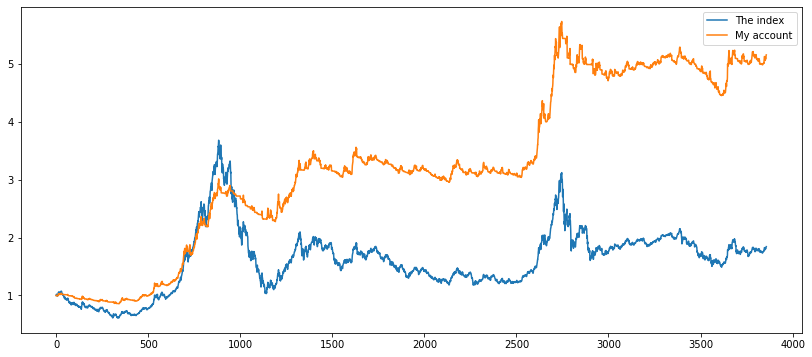

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
index = index_df['close'] / index_df['close'][0]
my_account = np.array(all_value_list) / money_init
plt.plot(index, label='The index')
plt.plot(my_account, label='My account')
plt.legend()
plt.show()

# plt.figure(figsize=(16, 4))
# plt.plot(score_list)
# plt.legend()
# plt.show()

In [16]:
# 46 3

In [30]:
1.108 ** 16

5.159839184439321

In [21]:
1.050 ** 12

1.79585632602213